In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [51]:
df = pd.read_excel('lead_time_analysis_wf.xlsx', sheet_name='Lead_Time_Stats')
df.head()

,Product,order_count,lead_time_mean,lead_time_std,lead_time_min,lead_time_max,avg_delay,delay_std,lead_time_cv,on_time_rate,reliability_score,risk_category
0,1100A,2,31.00,14.14,21,41,4.00,5.66,0.456,50.0,57.5,HIGH_RISK
1,1100B,3,20.00,1.00,19,21,-0.67,0.58,0.050,100.0,98.1,LOW_RISK
2,116,5,33.00,8.06,22,41,8.40,6.27,0.244,20.0,44.2,HIGH_RISK
3,116R,6,23.67,6.12,18,35,3.17,8.28,0.259,66.7,71.8,MEDIUM_RISK
4,119,1,25.00,NaN,25,25,5.00,NaN,NaN,0.0,NaN,CRITICAL_RISK


In [52]:
grouped_df = df.groupby(['Product', 'lead_time_mean']).size().reset_index(name='count')
grouped_df.head()

,Product,lead_time_mean,count
0,1100A,31.00,1
1,1100B,20.00,1
2,116,33.00,1
3,116R,23.67,1
4,119,25.00,1


In [53]:
risk_counts = df['risk_category'].value_counts()
risk_percent = df['risk_category'].value_counts(normalize=True) * 100

summary_df = pd.DataFrame({'Count': risk_counts, 'Percentage': risk_percent.round(2)})
print(summary_df)

               Count  Percentage
risk_category                   
HIGH_RISK        118       60.51
MEDIUM_RISK       36       18.46
CRITICAL_RISK     34       17.44
LOW_RISK           7        3.59


In [54]:
risk_breakdown = df['risk_category'].value_counts()

Text(0.5, 1.0, 'Supply Chain Risk Distribution')

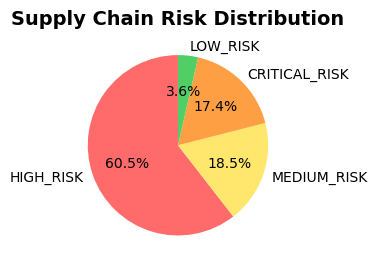

In [55]:
# Create subplot for risk categories
plt.subplot(1, 2, 1)
colors = ['#FF6B6B', '#FFE66D', '#FF9F43', '#51CF66']
pie_result = plt.pie(risk_breakdown.to_numpy(), labels=risk_breakdown.index, 
                     autopct='%1.1f%%', colors=colors, startangle=90)
if len(pie_result) == 3:
    wedges, texts, autotexts = pie_result
else:
    wedges, texts = pie_result
plt.title('Supply Chain Risk Distribution', fontsize=14, fontweight='bold')

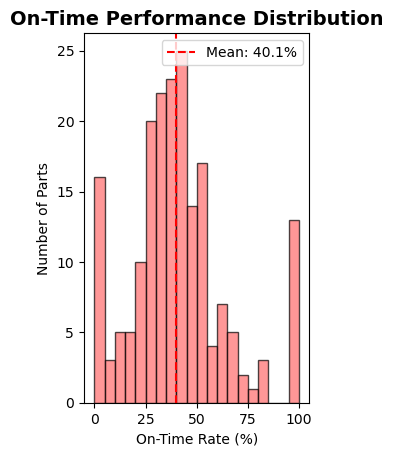

In [56]:
plt.subplot(1, 2, 2)
plt.hist(df['on_time_rate'], bins=20, alpha=0.7, color='#FF6B6B', edgecolor='black')
plt.xlabel('On-Time Rate (%)')
plt.ylabel('Number of Parts')
plt.title('On-Time Performance Distribution', fontsize=14, fontweight='bold')
plt.axvline(df['on_time_rate'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["on_time_rate"].mean():.1f}%')
plt.legend()
plt.show()

In [57]:
print(f"• {risk_breakdown['HIGH_RISK'] + risk_breakdown['CRITICAL_RISK']} parts ({(risk_breakdown['HIGH_RISK'] + risk_breakdown['CRITICAL_RISK'])/len(df)*100:.1f}%) are high/critical risk")
print(f"• Only {risk_breakdown['LOW_RISK']} parts ({risk_breakdown['LOW_RISK']/len(df)*100:.1f}%) are truly reliable")
print(f"• Average on-time rate is a dismal {df['on_time_rate'].mean():.1f}%")

• 152 parts (77.9%) are high/critical risk
• Only 7 parts (3.6%) are truly reliable
• Average on-time rate is a dismal 40.1%


In [58]:
# Create a dictionary mapping each risk category to a list of parts (Product)
parts_by_risk = {category: df[df['risk_category'] == category]['Product'].tolist() for category in risk_breakdown.index}
print(parts_by_risk)

{'HIGH_RISK': ['1100A', '116', '1400A', '1400B', '1401A056', '1401A076', '1401A086', '1401A096', '1401A106', '1401A116', '1401A126', '1401A136', '1401B096', '1502S', '1502WL', '1502WR', '1703B20RAW', '1703B22RAW', '1703B24RAW', '1703B26RAW', '1703B28RAW', '1703B30RAW', '1703B34RAW', '1703B40RAW', '20INRAD8', '302B', '303', '4000A', '4000C', '4000D', '4000DA', '4000E', '4000F', '4001A', '4001B', '4001D', '4002A', '4002A7', '4002B', '4002D', '4002E', '4002G', '4002H', '4003C', '4003E', '4003G', '4003H', '4003I', '4003J', '4003K', '4003N', '4003O', '4004A', '4004B', '4004C', '4005A', '4005B', '4005BA', '4006A', '4006B', '4007AA', '4007B', '4007C', '4008A', '4008B', '4008D', '4008E', '4008F', '4009A', '4009C', '4009D', '4009E', '4009F', '4009G', '4009H', '4009I', '4010AL', '4010AR', '4010BL', '4010BR', '4010C', '4011AEA', '4011B', '4011BEA', '4012AEA', '4012B', '4012BEA', '4012C', '4012CEA', '4012DEA', '4013A', '4013AA', '4013AAEA', '4013C', '4013EEA', '4014A', '4014B', '4014D', '4014F', '

In [59]:
overview_df = pd.read_excel("DAN_ATL .xlsx",sheet_name="OVERVIEW")

Safety Factor by Risk Category:
                   mean       std  count
risk_category                           
CRITICAL_RISK  2.000000  0.000000     14
HIGH_RISK      1.560563  0.330575     71
LOW_RISK       2.000000  0.000000      5
MEDIUM_RISK    1.686957  0.323762     23


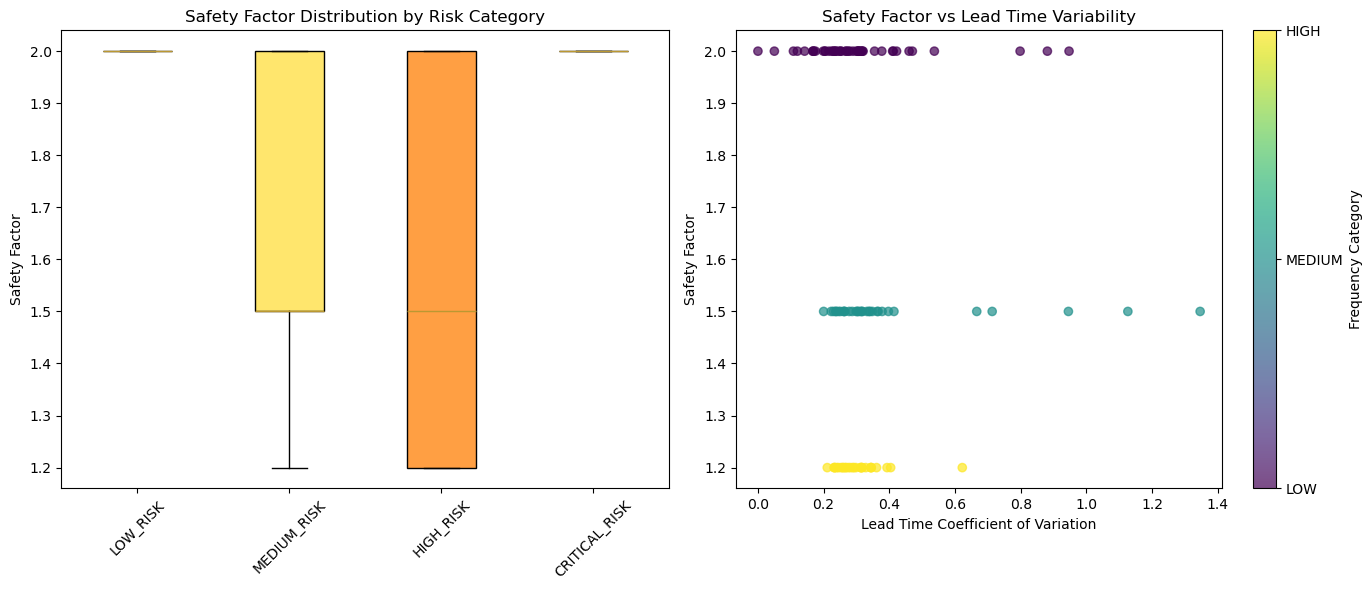

In [60]:
safety_factor_analysis = pd.merge(overview_df[['PART_NUMBER', 'SAFETY_FACTOR', 'FREQUENCY_CATEGORY', 'LEAD_TIME']], 
                                 df[['Product', 'risk_category', 'lead_time_cv']], 
                                 left_on='PART_NUMBER', right_on='Product', how='inner')

print("Safety Factor by Risk Category:")
risk_safety = safety_factor_analysis.groupby('risk_category')['SAFETY_FACTOR'].agg(['mean', 'std', 'count'])
print(risk_safety)

# Visualize the relationship
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
risk_categories = ['LOW_RISK', 'MEDIUM_RISK', 'HIGH_RISK', 'CRITICAL_RISK']
safety_by_risk = [safety_factor_analysis[safety_factor_analysis['risk_category'] == risk]['SAFETY_FACTOR'].values 
                 for risk in risk_categories]
bp = plt.boxplot(safety_by_risk, labels=risk_categories, patch_artist=True)
colors = ['#51CF66', '#FFE66D', '#FF9F43', '#FF6B6B']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Safety Factor')
plt.title('Safety Factor Distribution by Risk Category')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Map FREQUENCY_CATEGORY to numeric codes for coloring
freq_map = {cat: idx for idx, cat in enumerate(safety_factor_analysis['FREQUENCY_CATEGORY'].unique())}
freq_numeric = safety_factor_analysis['FREQUENCY_CATEGORY'].map(freq_map)
scatter = plt.scatter(safety_factor_analysis['lead_time_cv'], safety_factor_analysis['SAFETY_FACTOR'], 
                      c=freq_numeric, cmap='viridis', alpha=0.7)
plt.xlabel('Lead Time Coefficient of Variation')
plt.ylabel('Safety Factor')
plt.title('Safety Factor vs Lead Time Variability')
cbar = plt.colorbar(scatter, ticks=list(freq_map.values()))
cbar.ax.set_yticklabels(list(freq_map.keys()))
cbar.set_label('Frequency Category')

plt.tight_layout()
plt.show()

💰 FINANCIAL IMPACT ANALYSIS:
Current Inventory Investment: $343,689.70
Annual Projected Demand: $1,323,343.93
Potential Annual Savings: $108,220.00
ROI from Optimization: 31.5%


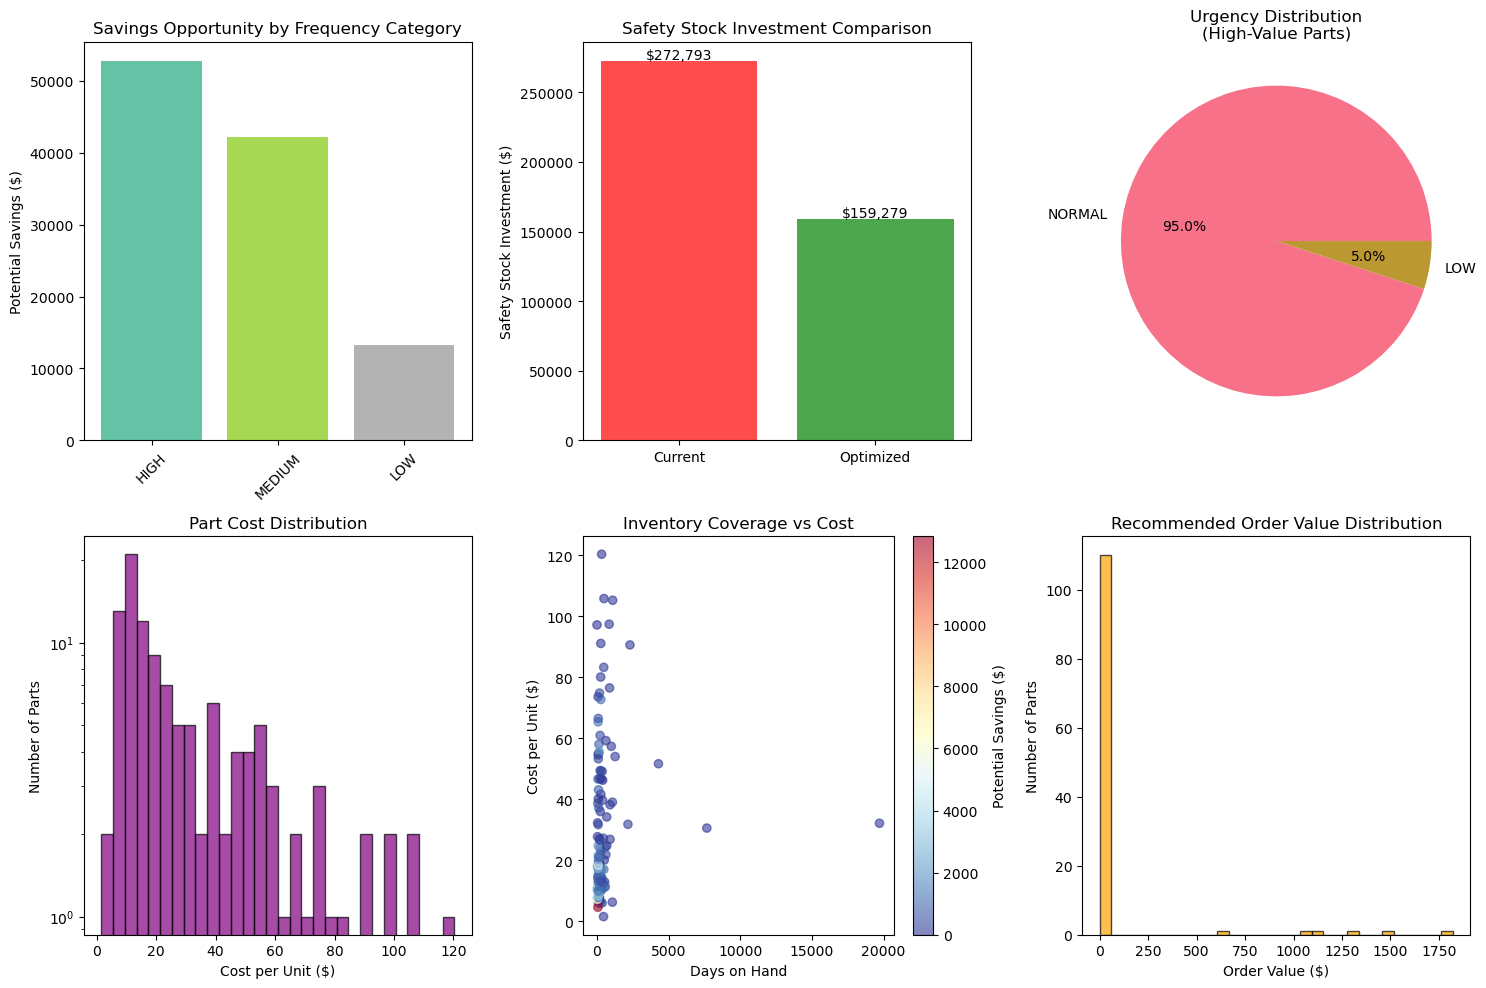

In [61]:


print("💰 FINANCIAL IMPACT ANALYSIS:")
print("=" * 60)

try:
    # Total investment analysis
    total_inventory_value = overview_df['INVENTORY_AMOUNT_ONHAND'].sum()
    total_potential_savings = overview_df['POTENTIAL_SAVINGS'].sum()
    annual_projected_demand = (overview_df['PROJECTED EOY 2025 USAGE'] * overview_df['COST']).sum()

    print(f"Current Inventory Investment: ${total_inventory_value:,.2f}")
    print(f"Annual Projected Demand: ${annual_projected_demand:,.2f}")
    print(f"Potential Annual Savings: ${total_potential_savings:,.2f}")
    print(f"ROI from Optimization: {(total_potential_savings/total_inventory_value)*100:.1f}%")

    # Break down savings by category
    plt.figure(figsize=(15, 10))

    # Savings by frequency category
    plt.subplot(2, 3, 1)
    savings_by_freq = overview_df.groupby('FREQUENCY_CATEGORY')['POTENTIAL_SAVINGS'].sum().sort_values(ascending=False)
    plt.bar(range(len(savings_by_freq)), savings_by_freq.values, 
            color=plt.cm.Set2(np.linspace(0, 1, len(savings_by_freq))))
    plt.xticks(range(len(savings_by_freq)), savings_by_freq.index, rotation=45)
    plt.ylabel('Potential Savings ($)')
    plt.title('Savings Opportunity by Frequency Category')

    # Current vs Optimal Inventory Investment
    plt.subplot(2, 3, 2)
    current_investment = (overview_df['SAFETY_STOCK'] * overview_df['COST']).sum()
    optimal_investment = (overview_df['OPTIMAL_SAFETY_STOCK'] * overview_df['COST']).sum()
    plt.bar(['Current', 'Optimized'], [current_investment, optimal_investment], 
            color=['red', 'green'], alpha=0.7)
    plt.ylabel('Safety Stock Investment ($)')
    plt.title('Safety Stock Investment Comparison')
    for i, v in enumerate([current_investment, optimal_investment]):
        plt.text(i, v + 1000, f'${v:,.0f}', ha='center')

    # High-value parts analysis
    plt.subplot(2, 3, 3)
    high_value_threshold = overview_df['INVENTORY_AMOUNT_ONHAND'].quantile(0.8)
    high_value_parts = overview_df[overview_df['INVENTORY_AMOUNT_ONHAND'] > high_value_threshold]
    urgency_high_value = high_value_parts['URGENCY_LEVEL'].value_counts()
    if not urgency_high_value.empty:
        plt.pie(urgency_high_value.values, labels=urgency_high_value.index, autopct='%1.1f%%')
        plt.title('Urgency Distribution\n(High-Value Parts)')

    # Cost per unit analysis
    plt.subplot(2, 3, 4)
    plt.hist(overview_df['COST'].dropna(), bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.xlabel('Cost per Unit ($)')
    plt.ylabel('Number of Parts')
    plt.title('Part Cost Distribution')
    plt.yscale('log')

    # Days on hand vs cost analysis
    plt.subplot(2, 3, 5)
    plt.scatter(overview_df['DAYS_ON_HAND'].dropna(), overview_df['COST'].dropna(), 
               c=overview_df['POTENTIAL_SAVINGS'], cmap='RdYlBu_r', alpha=0.6)
    plt.xlabel('Days on Hand')
    plt.ylabel('Cost per Unit ($)')
    plt.title('Inventory Coverage vs Cost')
    plt.colorbar(label='Potential Savings ($)')

    # Order value distribution
    plt.subplot(2, 3, 6)
    order_values = overview_df['ORDER_VALUE'].dropna()
    if not order_values.empty:
        plt.hist(order_values, bins=30, alpha=0.7, color='orange', edgecolor='black')
        plt.xlabel('Order Value ($)')
        plt.ylabel('Number of Parts')
        plt.title('Recommended Order Value Distribution')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")
    # Clean up any open plots
    plt.close('all')


In [62]:
print("🏗️ SYSTEM ARCHITECTURE:")
print("=" * 50)

components = {
    "Data Sources": [
        "• Historical order data",
        "• Lead time performance metrics", 
        "• Current inventory levels",
        "• Supplier reliability scores",
        "• Cost and weight data"
    ],
    "Analytics Engine": [
        "• Lead time statistical analysis",
        "• Demand forecasting models",
        "• Safety stock optimization",
        "• Risk categorization",
        "• Weight constraint optimization"
    ],
    "Decision Support": [
        "• Urgency level classification",
        "• Bundle quantity optimization",
        "• Reorder point calculations",
        "• Cost-benefit analysis",
        "• Savings identification"
    ],
    "Output Systems": [
        "• Order recommendations",
        "• Performance dashboards",
        "• Exception reports",
        "• Financial impact summaries"
    ]
}

for category, items in components.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  {item}")


🏗️ SYSTEM ARCHITECTURE:

Data Sources:
  • Historical order data
  • Lead time performance metrics
  • Current inventory levels
  • Supplier reliability scores
  • Cost and weight data

Analytics Engine:
  • Lead time statistical analysis
  • Demand forecasting models
  • Safety stock optimization
  • Risk categorization
  • Weight constraint optimization

Decision Support:
  • Urgency level classification
  • Bundle quantity optimization
  • Reorder point calculations
  • Cost-benefit analysis
  • Savings identification

Output Systems:
  • Order recommendations
  • Performance dashboards
  • Exception reports
  • Financial impact summaries


In [63]:
kpis = {
    'Inventory Turnover': annual_projected_demand / total_inventory_value,
    'Service Level': (overview_df['DAYS_ON_HAND'] > 30).sum() / len(overview_df) * 100,
    'Capital Efficiency': total_potential_savings / total_inventory_value * 100,
    'Risk Mitigation': (overview_df['OPTIMAL_SAFETY_STOCK'] > overview_df['SAFETY_STOCK']).sum(),
    'Coverage Optimization': overview_df['DAYS_ON_HAND'].mean()
}

print("\n📈 KEY PERFORMANCE INDICATORS:")
print("=" * 50)
for kpi, value in kpis.items():
    if 'Level' in kpi or 'Efficiency' in kpi:
        print(f"{kpi}: {value:.1f}%")
    elif 'Turnover' in kpi or 'Coverage' in kpi:
        print(f"{kpi}: {value:.1f}")
    else:
        print(f"{kpi}: {value:.0f}")


📈 KEY PERFORMANCE INDICATORS:
Inventory Turnover: 3.9
Service Level: 96.6%
Capital Efficiency: 31.5%
Risk Mitigation: 8
Coverage Optimization: 580.4


In [64]:
monitoring_framework = pd.DataFrame({
    'Metric': ['On-Time Delivery Rate', 'Stockout Incidents', 'Inventory Value', 
               'Order Frequency', 'Supplier Performance', 'Cost per Unit'],
    'Current': [40.1, 'Unknown', f'${total_inventory_value:,.0f}', 'Variable', 'Poor', 'Variable'],
    'Target': [85.0, '<5/month', 'Optimized', 'Predictable', 'Improved', 'Stable'],
    'Review_Frequency': ['Weekly', 'Daily', 'Monthly', 'Weekly', 'Monthly', 'Quarterly']
})

print("\n📊 MONITORING FRAMEWORK:")
print("=" * 80)
for idx, row in monitoring_framework.iterrows():
    print(f"{row['Metric']:<25} Current: {row['Current']:<15} Target: {row['Target']:<15} Review: {row['Review_Frequency']}")


📊 MONITORING FRAMEWORK:
On-Time Delivery Rate     Current: 40.1            Target: 85.0            Review: Weekly
Stockout Incidents        Current: Unknown         Target: <5/month        Review: Daily
Inventory Value           Current: $343,690        Target: Optimized       Review: Monthly
Order Frequency           Current: Variable        Target: Predictable     Review: Weekly
Supplier Performance      Current: Poor            Target: Improved        Review: Monthly
Cost per Unit             Current: Variable        Target: Stable          Review: Quarterly


🔮 DEMAND FORECASTING METHODOLOGY:


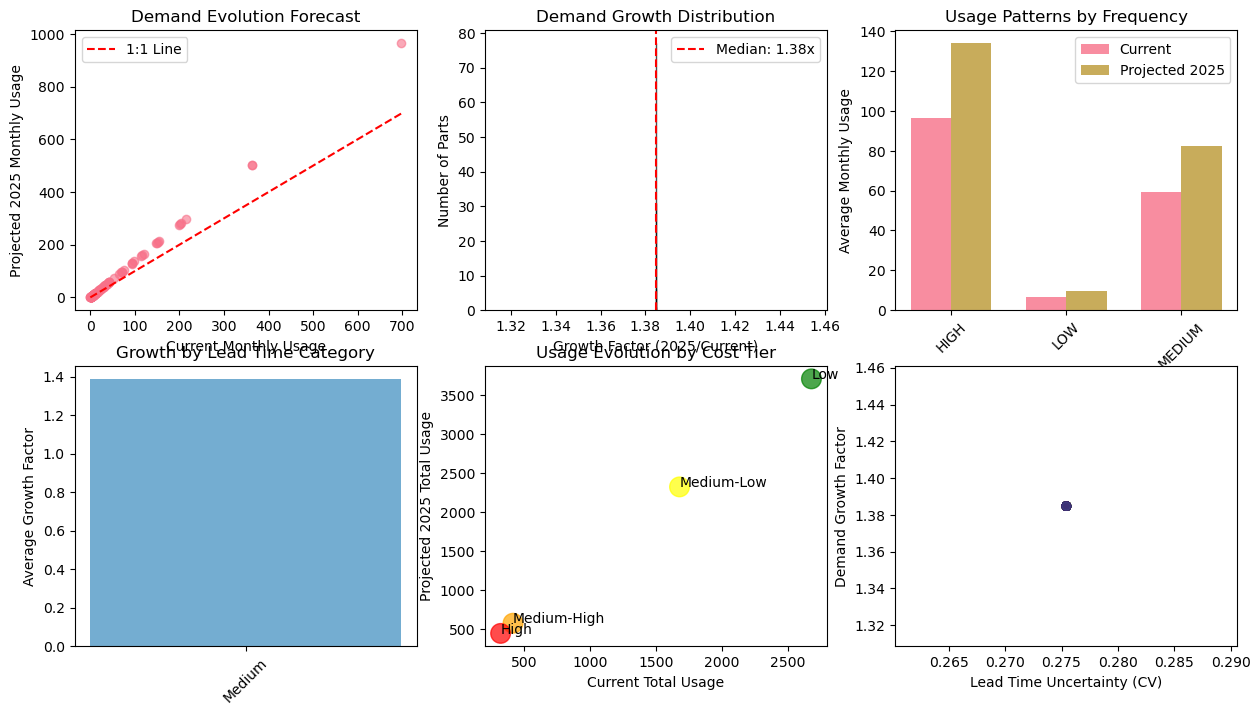


📈 FORECASTING INSIGHTS:
• Average demand growth expected: 1.4x
• 0 parts show >50% growth projection
• 0 parts show declining demand
• Highest growth in HIGH category


In [65]:
print("🔮 DEMAND FORECASTING METHODOLOGY:")
print("=" * 60)

# Compare current vs projected usage
current_vs_projected = overview_df[['PART_NUMBER', 'CURRENT_MONTHLY_USAGE', 'PROJECTED MONTHLY USAGE 2025']].dropna()
growth_factor = current_vs_projected['PROJECTED MONTHLY USAGE 2025'] / current_vs_projected['CURRENT_MONTHLY_USAGE']

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.scatter(current_vs_projected['CURRENT_MONTHLY_USAGE'], 
           current_vs_projected['PROJECTED MONTHLY USAGE 2025'], alpha=0.6)
plt.plot([0, current_vs_projected['CURRENT_MONTHLY_USAGE'].max()], 
         [0, current_vs_projected['CURRENT_MONTHLY_USAGE'].max()], 'r--', label='1:1 Line')
plt.xlabel('Current Monthly Usage')
plt.ylabel('Projected 2025 Monthly Usage')
plt.title('Demand Evolution Forecast')
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(growth_factor, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Growth Factor (2025/Current)')
plt.ylabel('Number of Parts')
plt.title('Demand Growth Distribution')
plt.axvline(growth_factor.median(), color='red', linestyle='--', 
            label=f'Median: {growth_factor.median():.2f}x')
plt.legend()

plt.subplot(2, 3, 3)
# Frequency impact on demand stability
freq_demand = overview_df.groupby('FREQUENCY_CATEGORY').agg({
    'CURRENT_MONTHLY_USAGE': 'mean',
    'PROJECTED MONTHLY USAGE 2025': 'mean'
}).reset_index()

x = np.arange(len(freq_demand))
width = 0.35
plt.bar(x - width/2, freq_demand['CURRENT_MONTHLY_USAGE'], width, 
        label='Current', alpha=0.8)
plt.bar(x + width/2, freq_demand['PROJECTED MONTHLY USAGE 2025'], width, 
        label='Projected 2025', alpha=0.8)
plt.xlabel('Frequency Category')
plt.ylabel('Average Monthly Usage')
plt.title('Usage Patterns by Frequency')
plt.xticks(x, freq_demand['FREQUENCY_CATEGORY'], rotation=45)
plt.legend()

# Lead time impact on forecasting
plt.subplot(2, 3, 4)
leadtime_bins = pd.cut(overview_df['LEAD_TIME'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
leadtime_growth = overview_df.groupby(leadtime_bins).apply(
    lambda x: (x['PROJECTED MONTHLY USAGE 2025'] / x['CURRENT_MONTHLY_USAGE']).mean()
).dropna()

plt.bar(range(len(leadtime_growth)), leadtime_growth.values, 
        color=plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(leadtime_growth))))
plt.xticks(range(len(leadtime_growth)), leadtime_growth.index, rotation=45)
plt.ylabel('Average Growth Factor')
plt.title('Growth by Lead Time Category')

# Cost impact visualization
plt.subplot(2, 3, 5)
cost_bins = pd.qcut(overview_df['COST'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
cost_demand = overview_df.groupby(cost_bins).agg({
    'CURRENT_MONTHLY_USAGE': 'sum',
    'PROJECTED MONTHLY USAGE 2025': 'sum'
}).reset_index()

plt.scatter(cost_demand['CURRENT_MONTHLY_USAGE'], cost_demand['PROJECTED MONTHLY USAGE 2025'],
           s=200, c=['green', 'yellow', 'orange', 'red'], alpha=0.7)
for i, cost_cat in enumerate(cost_demand['COST']):
    plt.annotate(cost_cat, (cost_demand.iloc[i]['CURRENT_MONTHLY_USAGE'], 
                           cost_demand.iloc[i]['PROJECTED MONTHLY USAGE 2025']))
plt.xlabel('Current Total Usage')
plt.ylabel('Projected 2025 Total Usage')
plt.title('Usage Evolution by Cost Tier')

# Uncertainty analysis
plt.subplot(2, 3, 6)
uncertainty_proxy = overview_df['LEAD_TIME_STD'] / overview_df['LEAD_TIME']
uncertainty_proxy = overview_df['LEAD_TIME_STD'] / overview_df['LEAD_TIME']

# Create a mask for valid (non-NaN, non-infinite) values
valid_mask = (
    np.isfinite(uncertainty_proxy) & 
    np.isfinite(growth_factor) & 
    np.isfinite(overview_df['FREQUENCY'])
)

# Filter all arrays using the same mask
x_clean = uncertainty_proxy[valid_mask]
y_clean = growth_factor[valid_mask]
c_clean = overview_df['FREQUENCY'][valid_mask]

# Now create the scatter plot
plt.scatter(x_clean, y_clean, alpha=0.6, c=c_clean, cmap='viridis')
plt.xlabel('Lead Time Uncertainty (CV)')
plt.ylabel('Demand Growth Factor')
plt.show()

print(f"\n📈 FORECASTING INSIGHTS:")
print(f"• Average demand growth expected: {growth_factor.mean():.1f}x")
print(f"• {(growth_factor > 1.5).sum()} parts show >50% growth projection")
print(f"• {(growth_factor < 0.8).sum()} parts show declining demand")
print(f"• Highest growth in {freq_demand.loc[freq_demand['PROJECTED MONTHLY USAGE 2025'].idxmax(), 'FREQUENCY_CATEGORY']} category")